In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
data = pd.read_csv('merged_data.csv')  
data = data.dropna()  # 删除缺失值
data

,grid_id,PR,BH_avg,APAR,RD,poi_diversity,dominant_function_ratio,PD,ED,LPI,nli,LST_mean
0,2881,0.506833,8.586207,0.196614,0.000000,0.0,0.0,32.0,24000.0,70.25,4.505000,28.114286
1,2883,0.116892,8.000000,0.160467,0.000000,0.0,0.0,56.0,32300.0,50.75,4.512500,28.037083
2,2884,0.078891,12.000000,0.171742,0.000000,0.0,0.0,76.0,31800.0,60.00,4.825000,28.246786
3,2885,0.198074,9.000000,0.240156,0.000000,0.0,0.0,24.0,24300.0,35.00,4.997500,28.500612
4,2959,0.096358,10.615385,0.231717,0.000000,0.0,0.0,60.0,27100.0,54.25,9.970000,28.930476
...,...,...,...,...,...,...,...,...,...,...,...,...
3416,40478,0.634415,17.500000,0.253808,0.000000,0.0,0.0,36.0,20700.0,69.25,8.316667,29.023810
3417,40481,1.137559,33.567568,0.309229,0.000000,0.0,0.0,64.0,29100.0,61.25,3.653333,28.357143
3418,40488,0.302997,54.000000,0.195655,0.000000,0.0,0.0,16.0,19500.0,50.75,2.342500,28.302857
3419,40493,0.249920,19.043478,0.361309,135.807894,0.0,0.0,28.0,16700.0,70.50,8.515000,27.788095


#### Data Visualization

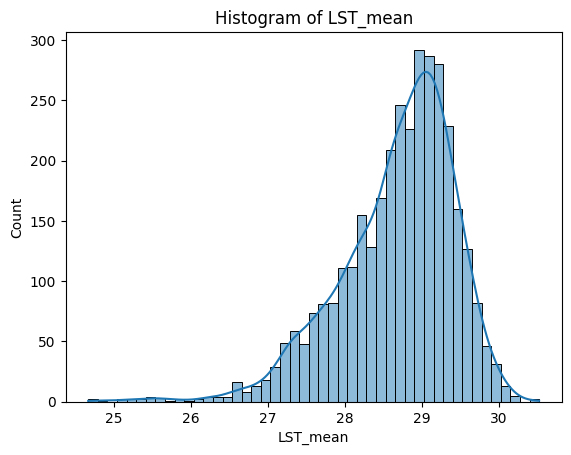

In [3]:
sns.histplot(data['LST_mean'], kde=True)
plt.title('Histogram of LST_mean')
plt.show()

### Training

In [4]:
feature_columns = ['PR', 'BH_avg', 'APAR', 'RD', 'poi_diversity',
                   'dominant_function_ratio', 'PD', 'ED', 'LPI', 'nli']
target_column = 'LST_mean'

X = data[feature_columns]
y = data[target_column]

In [5]:
random_state = 42

from sklearn.preprocessing import StandardScaler
# feature standardization
scaler = StandardScaler() #! condition 1
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

In [7]:
# train XGBRegressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=random_state, n_estimators=100, learning_rate=0.1, max_depth=6) #! condition 2
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Evaluation

In [8]:
y_pred = xgb_model.predict(X_test)

#### Prediction Analysis

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"均方误差 (MSE): {mse}")
print(f"决定系数 (R²): {r2}")

均方误差 (MSE): 0.4077893775594721
决定系数 (R²): 0.2171341015009186


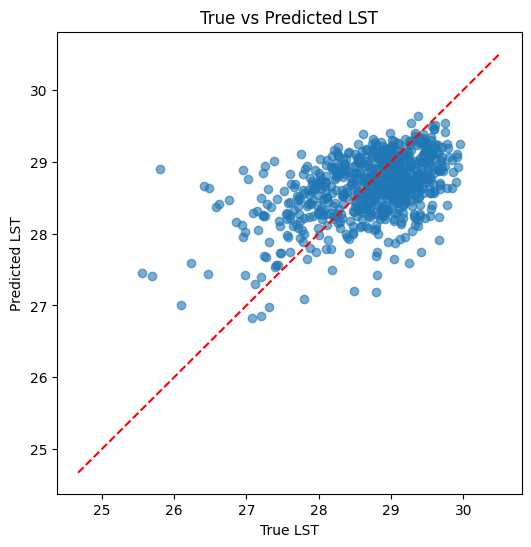

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('True LST')
plt.ylabel('Predicted LST')
plt.title('True vs Predicted LST')
plt.show()

## SHAP analysis

In [ ]:
import shap
shap.initjs()


explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

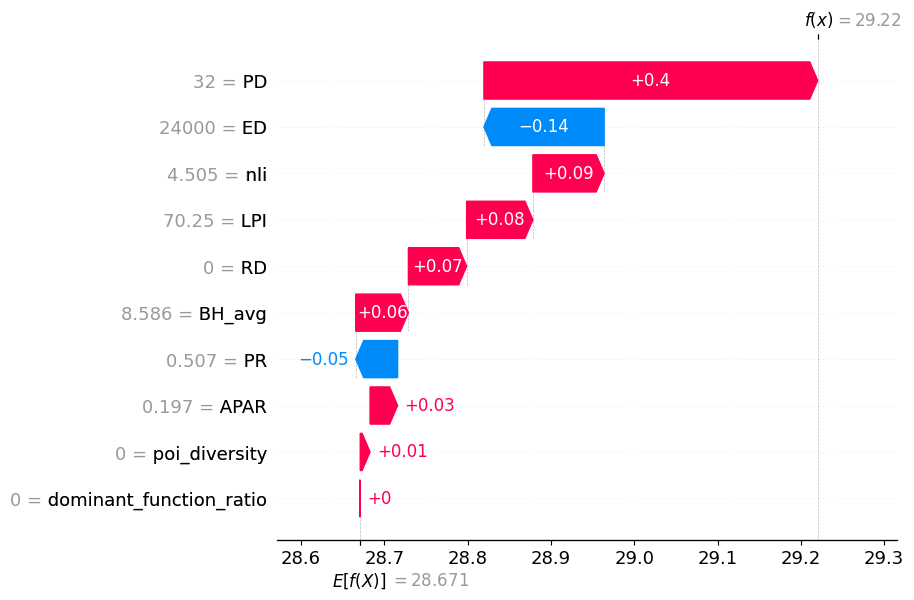

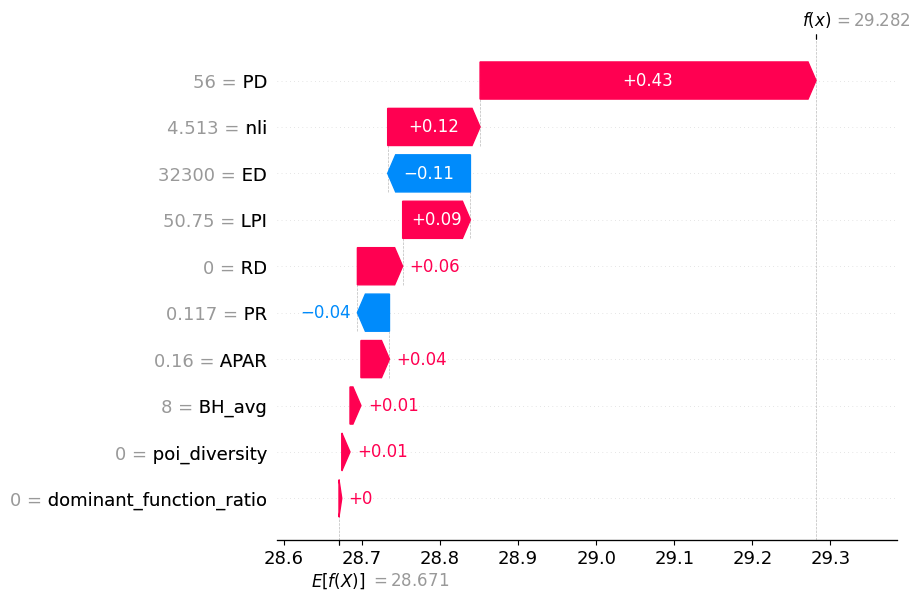

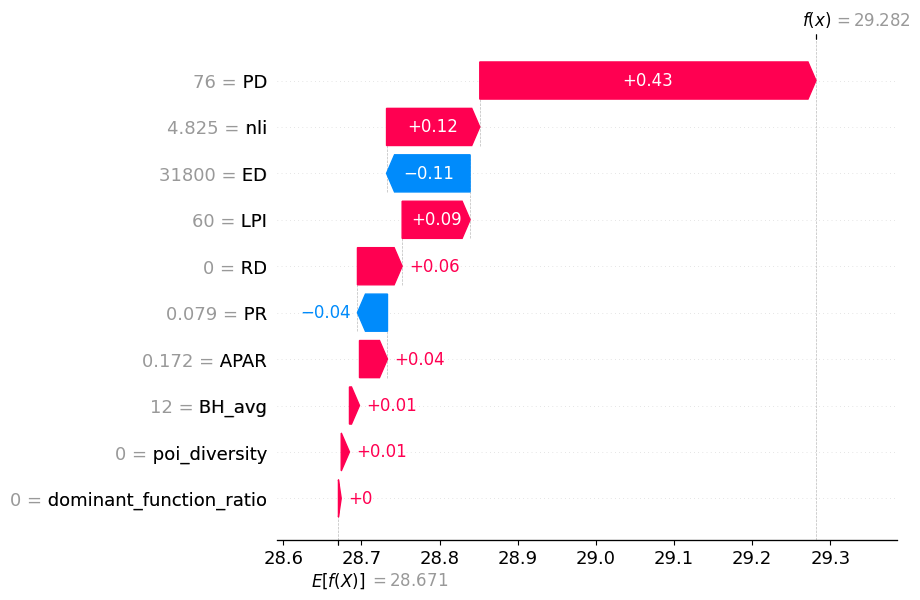

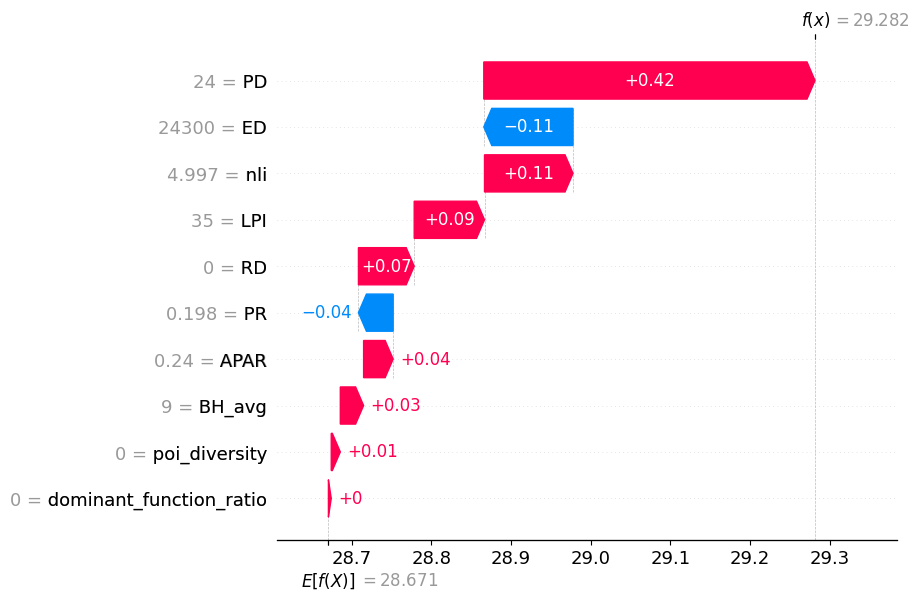

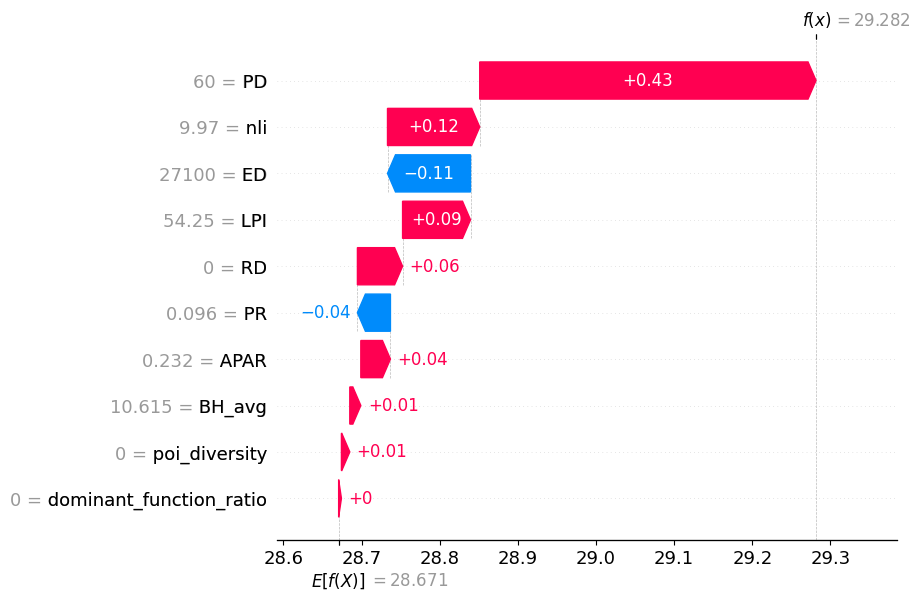

In [12]:
for data_idx in range(5):
    shap.plots.waterfall(shap_values[data_idx])

In [15]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

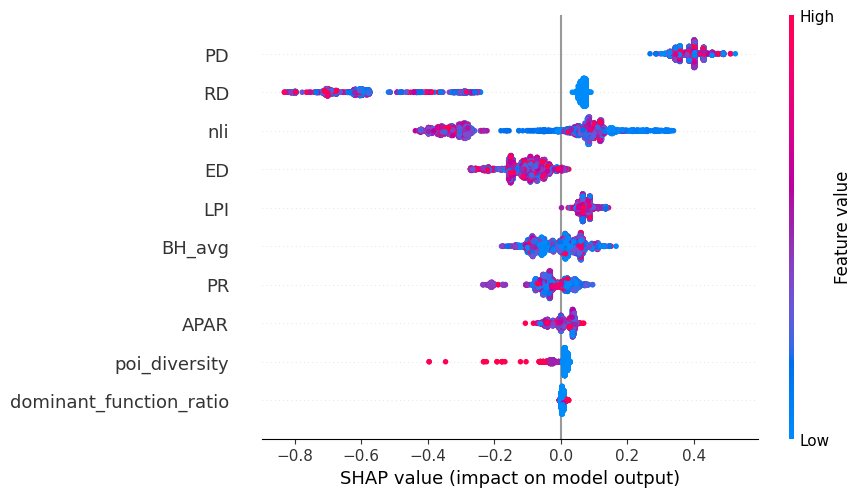

In [16]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

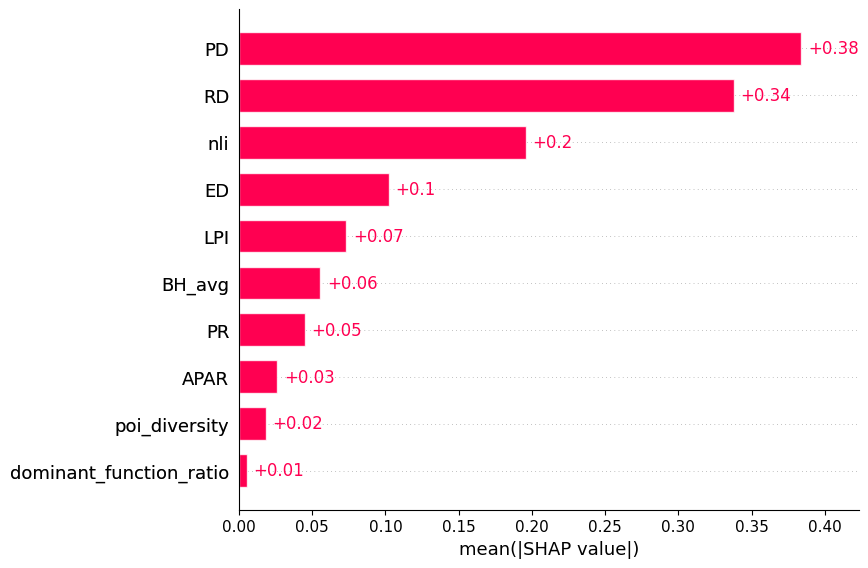

In [17]:
shap.plots.bar(shap_values)